In [1]:
%run "preamble.ipynb"
%matplotlib inline
import torch
from torch.autograd import Variable
from dl4nlp.util import *
from dl4nlp.einsum import einsum
from torch import nn
import torch.nn.functional as F
import numpy as np
from torch.nn import Parameter
from dl4nlp.tikz import *
from dl4nlp.rnn import *
import IPython.display
IPython.display.display_latex(IPython.display.Latex(filename="tex/macros.tex"))

<IPython.core.display.Javascript object>

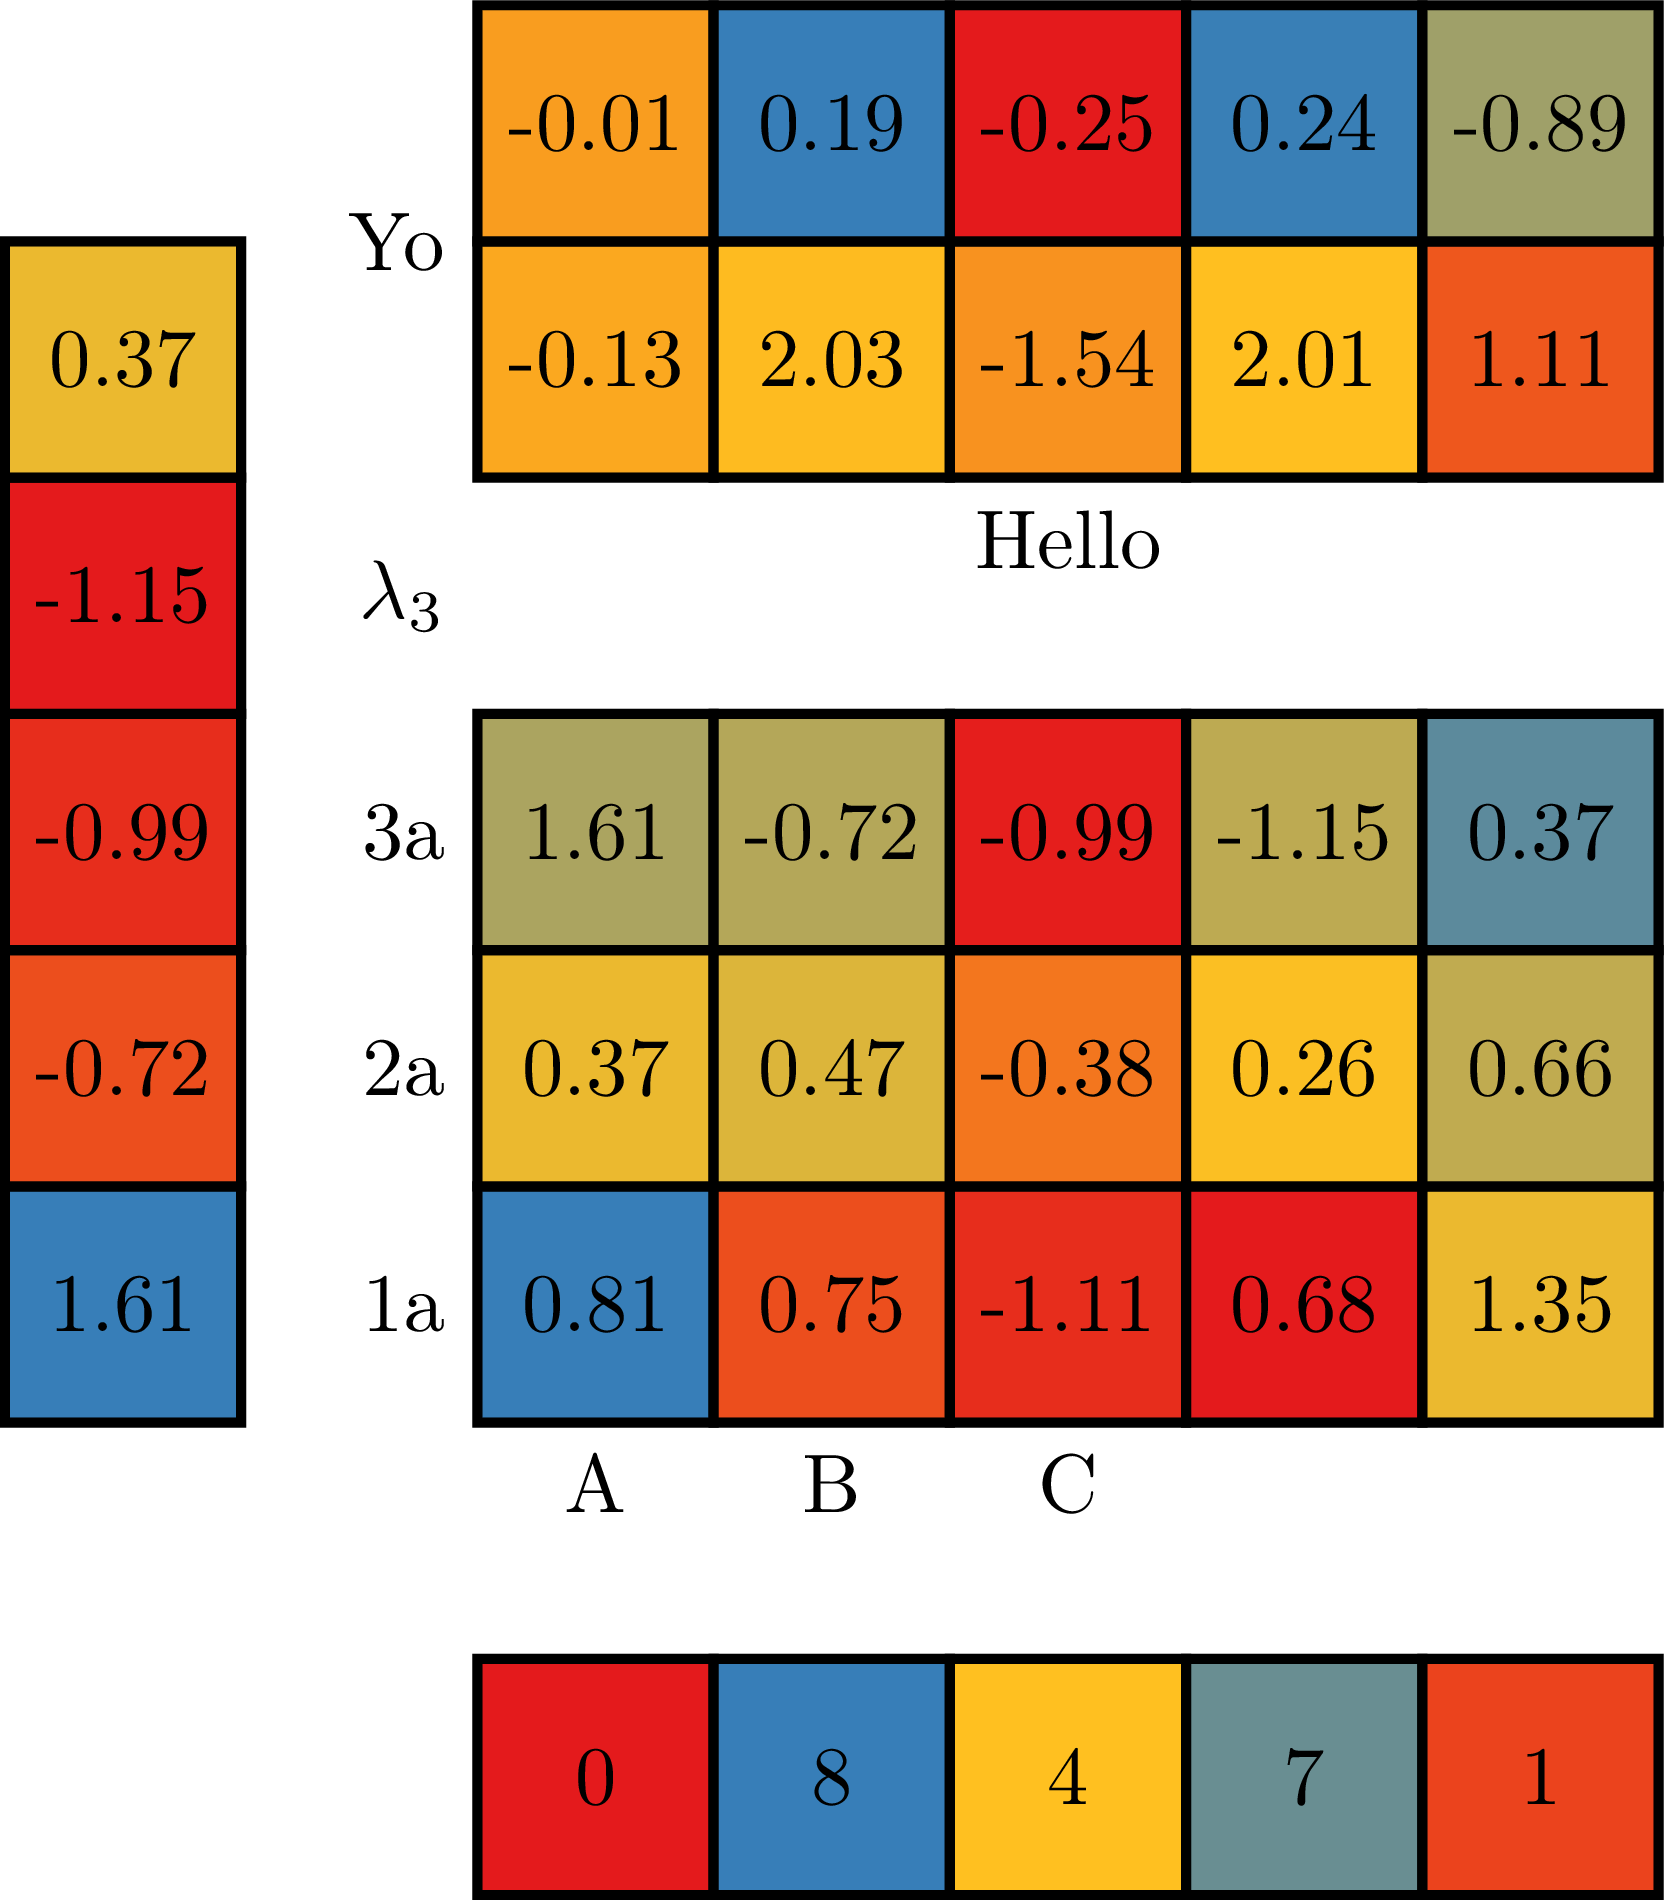

In [30]:
import math
import numpy as np

I = torch.LongTensor(1, 5).random_(0, 10)
X = torch.randn(3, 5)
Y = torch.randn(2, 5)
Z = torch.randn(4, 5)


def get_color(p, xmin=-1, xmax=1, upper_color="nice-blue", lower_color="nice-red", center_color="nice-yellow"):
    diff = xmax - xmin
    color = ""
    p = (p - xmin) / diff  * 100
    if p < 50:
        color = "%s!%2.2f!%s" % (lower_color, (100-p-50)*2, center_color)
    else:
        color = "%s!%2.2f!%s" % (upper_color, (p-50)*2, center_color)
    return color

def plot_matrix(M, xmin=None, xmax=None):
    if xmin is None or xmax is None:
        xmin = M.min()
        xmax = M.max()
    diff = xmax - xmin
    tmp = ""
    for i in range(M.size(0)):
        for j in range(M.size(1)):
            color = get_color(M[i,j], xmin, xmax)
            value = "%d" % M[M.size(0)-1-i,j] if isinstance(M, torch.LongTensor) else "%2.2f" % M[M.size(0)-1-i,j]
            tmp += "\draw[fill=%s] (-0.5+%d, %d) rectangle (0.5+%d, %d);\n" % (color, j, i, j, i+1)
            tmp += r"\node[] at (%d, %d+0.5) {%s};" % (j, i, value) + "\n"
    return tmp

def plot_vec(v, xmin=None, xmax=None):
    if xmin is None or xmax is None:
        xmin = v.min()
        xmax = v.max()
    diff = xmax - xmin
    tmp = ""
    for i in range(len(v)):
        color = get_color(v[i], xmin, xmax)
        tmp += "\draw[fill=%s] (-0.5, %d) rectangle (0.5, %d);\n" % (color, i, i+1)
        tmp += r"\node[] at (0.0, %d+0.5) {%2.2f};" % (i, v[i]) + "\n"
    return tmp

def ticks(xticks=None, yticks=None):
    tmp = ""
    if xticks is not None:
        for i, x in enumerate(xticks):
            tmp += r"\node[anchor=north] at (%d, 0) {%s};" % (i, x)
    if yticks is not None:
        for i, y in enumerate(yticks):
            tmp += r"\node[anchor=east] at (-0.5, %d+0.5) {%s};" % (i, y)
    return tmp

def labels(M, xlabel=None, ylabel=None):
    xsize, ysize = M.size()
    tmp = ""
    if xlabel is not None:
        tmp += r"\node[anchor=north] at (%d,0) {%s};" % (xsize/2+1, xlabel)
    if ylabel is not None:
        tmp += r"\node[anchor=east] at (-0.5,%d) {%s};" % (ysize/2-1, ylabel)        
    return tmp

def plot_tikz(xs, xdist=1, ydist=1):
    tmp = ""
    yshift = 0
    for l, M in enumerate(xs):
        # print(M)
        # print(yshift)
        assert len(M.size()) == 2
        # todo: get max and min value in matrix and color vector accordingly
        xmax = M.max()
        xmin = M.min()
        if yshift > 0:
            tmp += r"\begin{scope}[shift={(0,%d)}]" % yshift + "\n"
        for i in range(M.size(0)):
            tmp += r"\begin{scope}[shift={(%d,0)}]" % (i * (xdist + 1)) + "\n"
            tmp += plot_vec(M[i,:], xmin, xmax)
            tmp += r"\end{scope}" + "\n"
        if yshift > 0:
            tmp += r"\end{scope}" + "\n"
        yshift += M.size(1) + ydist
    return tmp

def shift(tikz, x=0, y=0):
    return r"\begin{scope}[shift={(%d,%d)}]" % (x, y) + "\n" + tikz + r"\end{scope}" + "\n"

fig = plot_matrix(X)
fig += ticks(["A", "B", "C"], ["1a", "2a", "3a", "$\lambda_3$"])
fig += shift(plot_matrix(Y) + labels(Y, "Hello", "Yo"), y=X.size(0)+1)
fig += shift(plot_vec(X[0]), -2)
fig += shift(plot_matrix(I), y=-2)
tikz(fig)